# Evaluates trained models.
Makes use of the saved histories and renders them for visual comparison.

In [2]:
%matplotlib inline
import glob
import pickle
import matplotlib.pyplot as plt

# Find all date-times.
Extracts the timestamps. Different timestamps will represent different models/trainings.

In [2]:
all_paths = glob.glob("../data/output/*")
date_times = []
for path in all_paths:
    split = path.split("/")[-1].split("-")
    date = split[0]
    time = split[1]
    date_time = date + "-" + time
    date_times.append(date_time)
date_times = sorted(list(set(date_times)))

# Processes the histories of date-times.

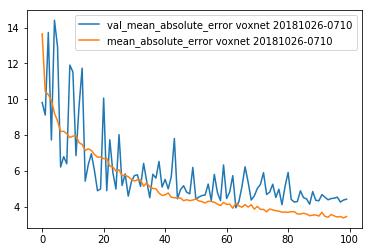

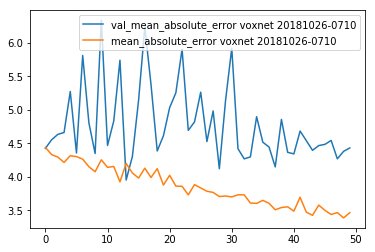

Done.


In [2]:
def plot_date_times(date_times, start_index, key_suffix=None):
    for date_time in date_times:

        # Load all histories for date-time.
        history_paths = [path for path in all_paths if "history" in path and date_time in path]
        histories = []
        for history_path in history_paths:
            history = pickle.load(open(history_path, "rb"))
            histories.append(history)

        # Plot the histories.
        for history, history_path in zip(histories, history_paths):
            split = history_path.split("/")[-1].split("-")
            for key in history.keys():
                if key_suffix != None and key_suffix in key:
                    plt.plot(history[key][start_index:], label=key + " " + split[2] + " " + date_time)
    plt.legend()
    plt.show()
    plt.close()

# Render MAE for whole histories.
plot_date_times(date_times, start_index=0, key_suffix="mean_absolute_error")

# Render MAE for the histories while skipping the first 50 epochs.
plot_date_times(date_times, start_index=50, key_suffix="mean_absolute_error")
print("Done.")